In [1]:
!unzip '/content/titanic.zip' -d '/content/titanic_data'

Archive:  /content/titanic.zip
  inflating: /content/titanic_data/gender_submission.csv  
  inflating: /content/titanic_data/test.csv  
  inflating: /content/titanic_data/train.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
%matplotlib inline
sns.set()

In [3]:
df_train = pd.read_csv('/content/titanic_data/train.csv')
df_test = pd.read_csv('/content/titanic_data/test.csv')

In [4]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

В колонке кабины очень мало данных - пренебрегаем это переменной
В колонке возраста у нас не хватает данных, так что подумаем, что будем с ней делать

In [8]:
df_train.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

Глянем описателдьные статистики

In [9]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

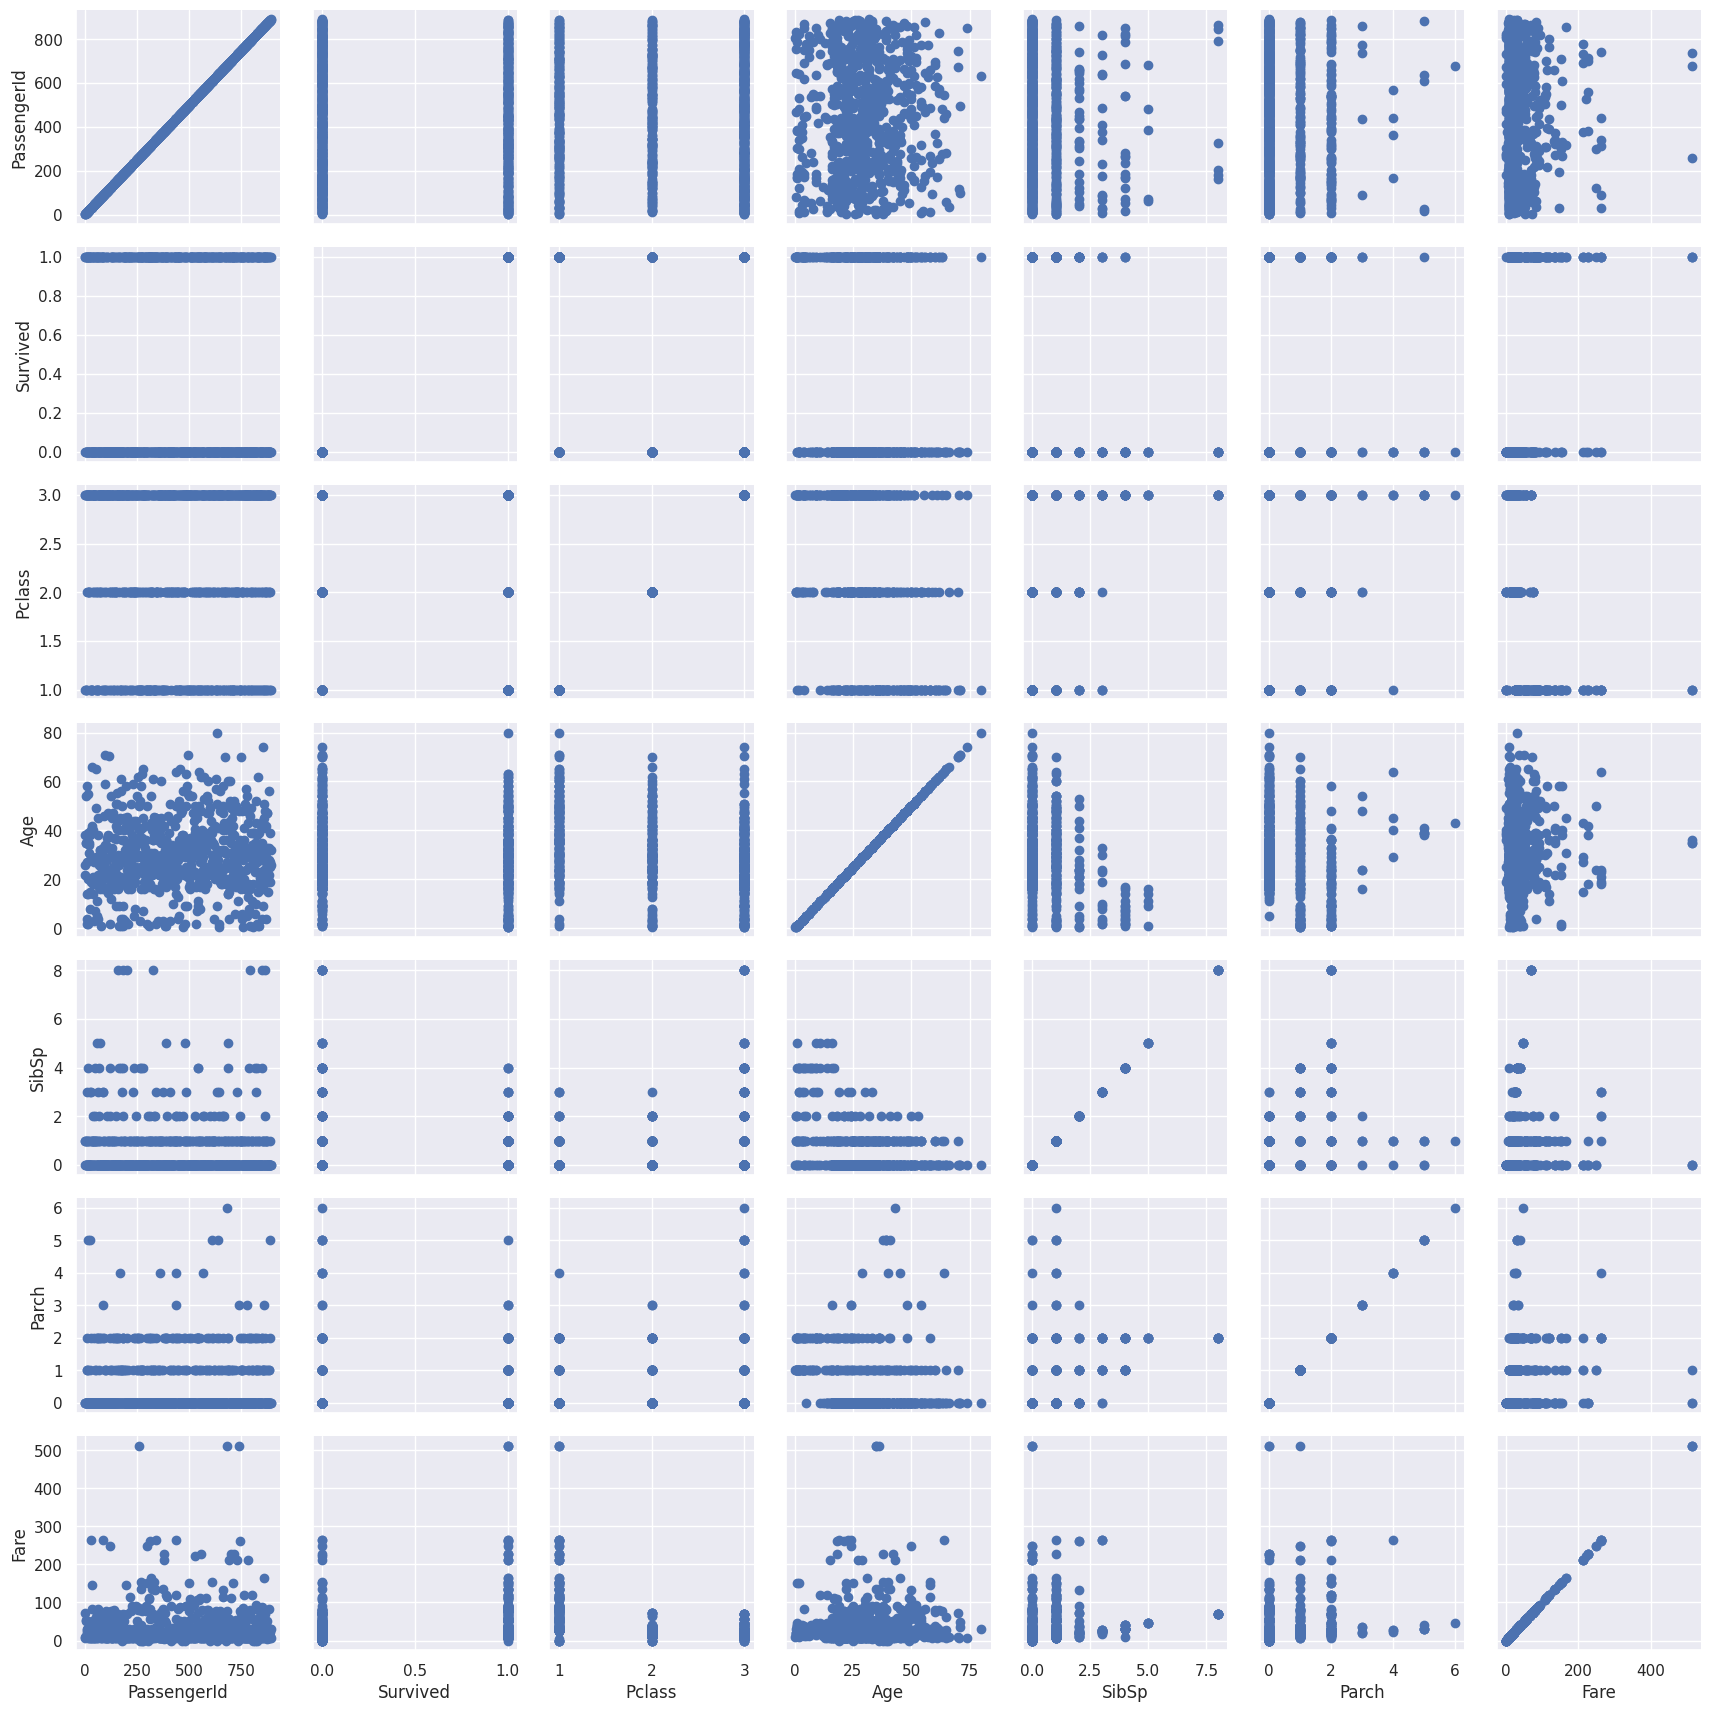

In [10]:
pair_grid_plot = sns.PairGrid(df_train)
pair_grid_plot.map(plt.scatter)
plt.show()

Удалим бесполезные столбцы(оверпредставленные переменные(много факторов))

In [11]:
df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

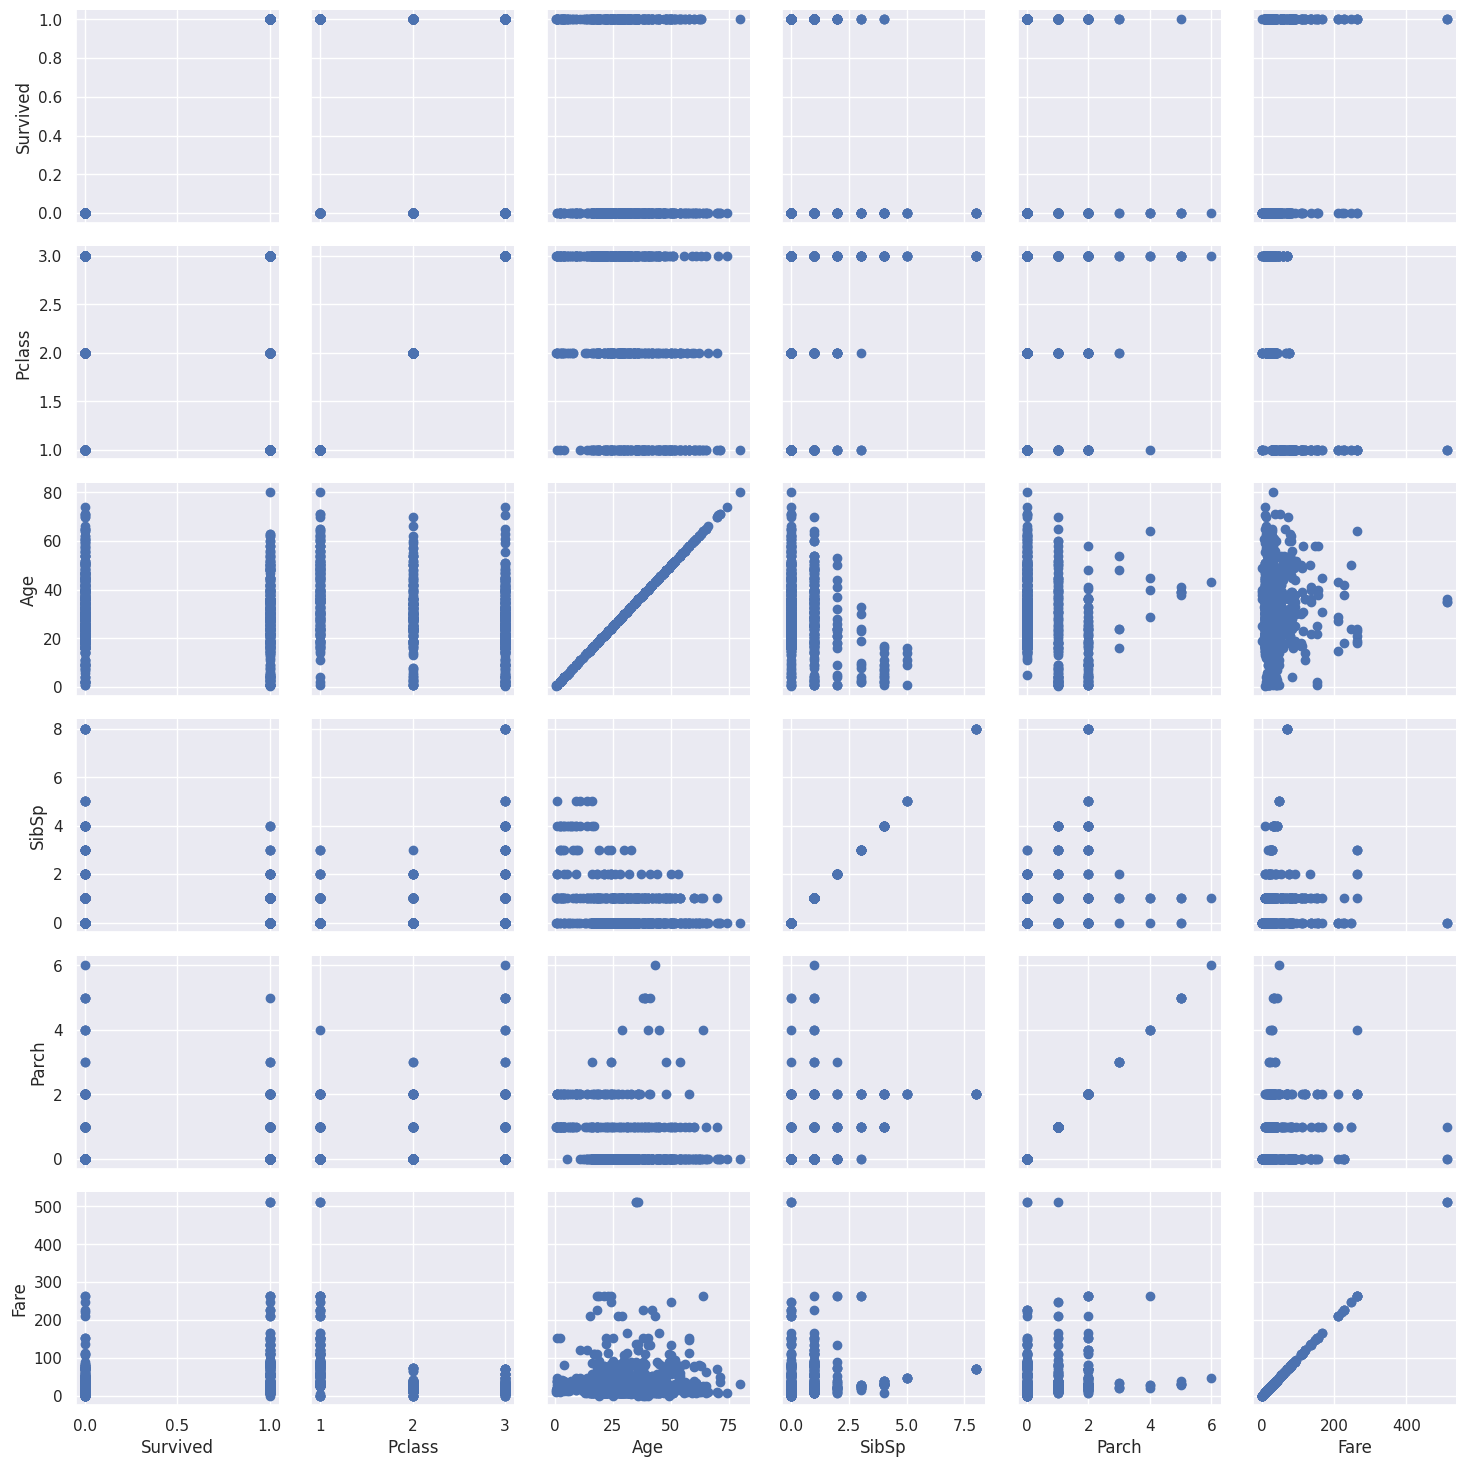

In [12]:
pair_grid_plot = sns.PairGrid(df_train)
pair_grid_plot.map(plt.scatter)
plt.show()

Взаимосвязи разные, survived/Age - на поверхности взаимосвязь может не лежать, например

Ради любопытства можем глянуть на распределение стоимости и возраста

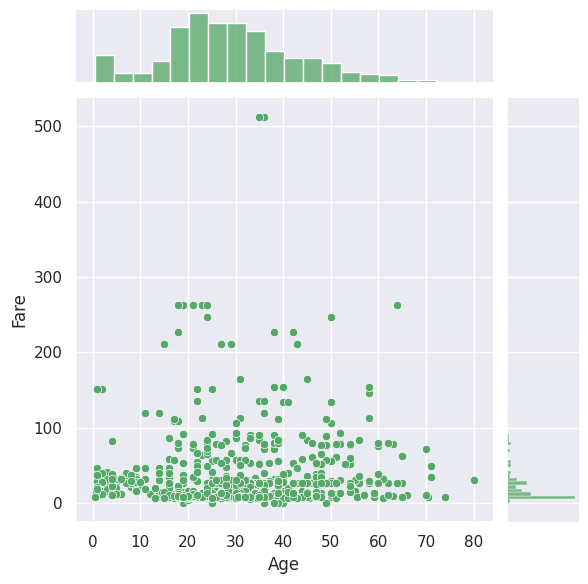

In [13]:
sns.jointplot(x='Age', y='Fare', data=df_train, color='g')
plt.show()

Можем глянуть на выбросы

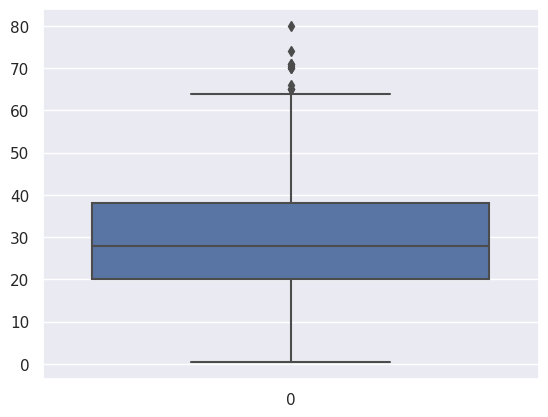

In [14]:
sns.boxplot(df_train['Age'])
plt.show()

нарисуем boxplot с видимым распределением

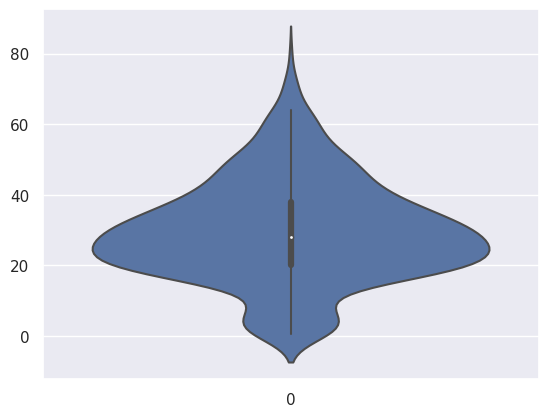

In [15]:
sns.violinplot(df_train['Age'])
plt.show()

Оценим, сколько всего пассажиров выжило на титанике

0.3838383838383838


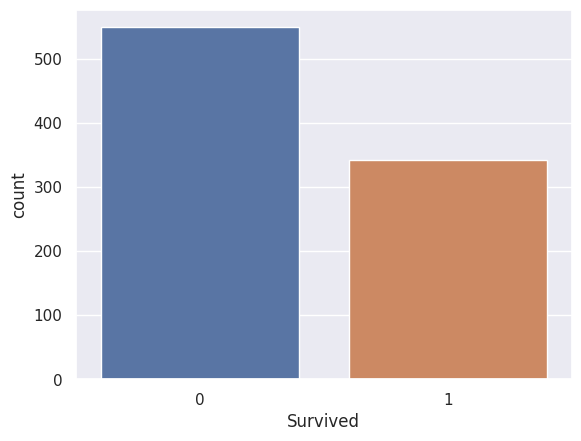

In [16]:
sns.countplot(x='Survived', data=df_train)
print(df_train.Survived.sum() / df_train.Survived.count())

Проверим, влияет ли пол на выживаемость


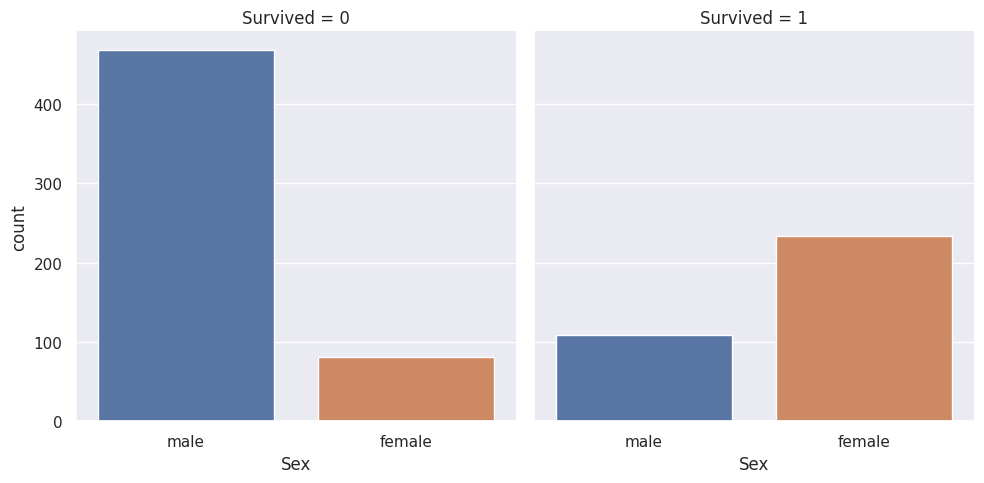

In [17]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train)
plt.show()

Числа нас особо не интересуют, переведем все в проценты(числа в нашем случае врать могут)

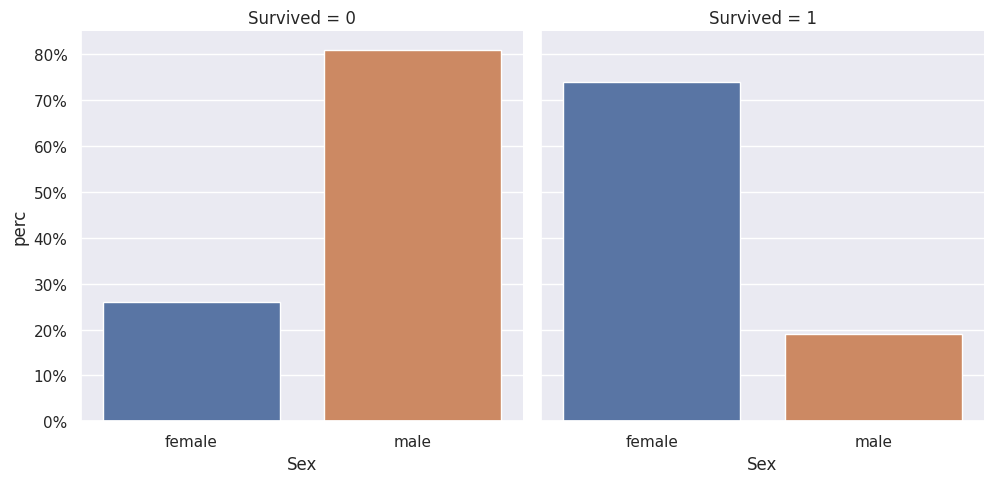

In [18]:
df_train_ad = (
    df_train.groupby(['Sex'])['Survived']
    .value_counts(normalize=True).round(2)
    .to_frame('perc').reset_index()
)

p = sns.catplot(x='Sex', y='perc', col='Survived', kind='bar', data=df_train_ad)
for ax in p.axes.flat:
  ax.yaxis.set_major_formatter(PercentFormatter(1))

Видно, что пол очень сильно влиял на выживаемость на титанике у мужчин 80% погибших, у девушек 25%, а среди выживших 20% мужчин и 80% женщин

Посмотрим получешие на доли выживших

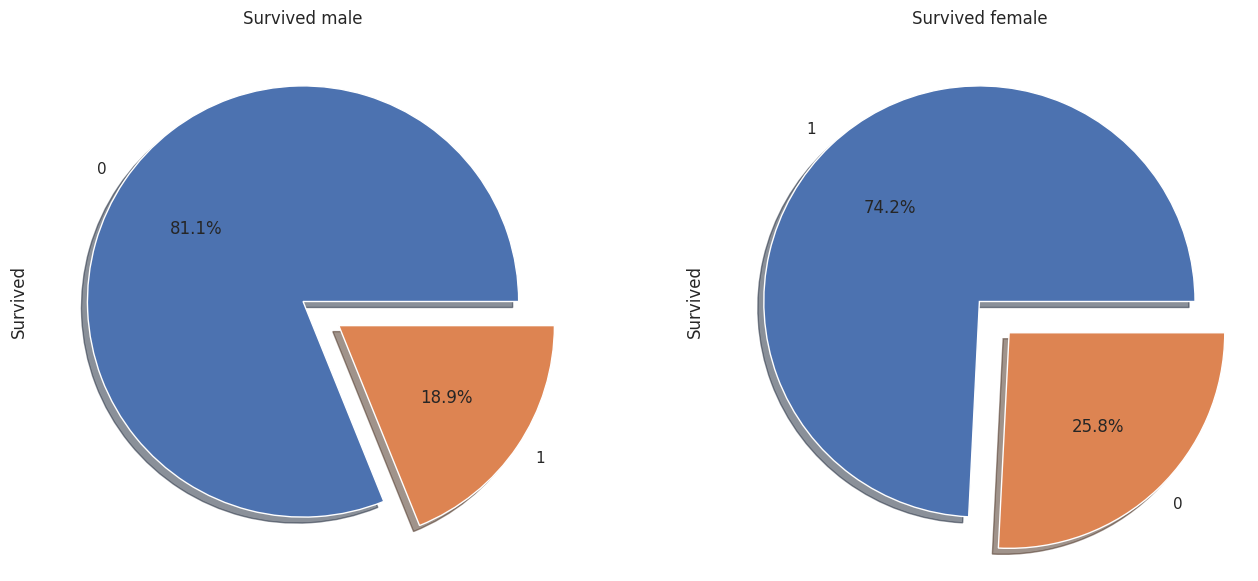

In [19]:
f, ax = plt.subplots(1, 2, figsize=(16, 7))
df_train['Survived'][df_train['Sex'] == 'male'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
df_train['Survived'][df_train['Sex'] == 'female'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Survived male')
ax[1].set_title('Survived female')
plt.show()

Посмотрим сводные таблицы(больше 2-х признаков)

In [20]:
#кросс таблица или таблица сопряженности
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

In [21]:
print('% of survuvals in')
print('Pclass 1:', df_train['Survived'][df_train.Pclass == 1].sum() / df_train[df_train.Pclass == 1].Survived.count())
print('Pclass 2:', df_train['Survived'][df_train.Pclass == 2].sum() / df_train[df_train.Pclass == 2].Survived.count())
print('Pclass 3:', df_train['Survived'][df_train.Pclass == 3].sum() / df_train[df_train.Pclass == 3].Survived.count())

% of survuvals in
Pclass 1: 0.6296296296296297
Pclass 2: 0.47282608695652173
Pclass 3: 0.24236252545824846


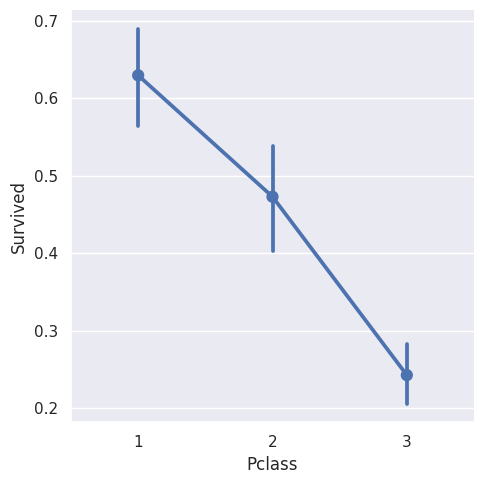

In [22]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=df_train)
plt.show()

Видно, что приизнак класса кают важен нам для выживаемости

Посмотрим, а влияет ли, помимо класса каюты, пол на выживаемость(уже не графики, количественные)

In [23]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

Видим так же, что мужчины 3 класса больше всего погибли

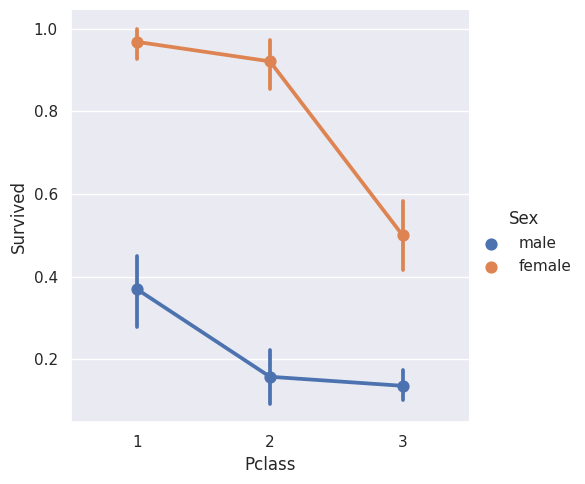

In [24]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=df_train)
plt.show()

еще гипотеза
А зависит ли выживаемость от порта, где садились люди???

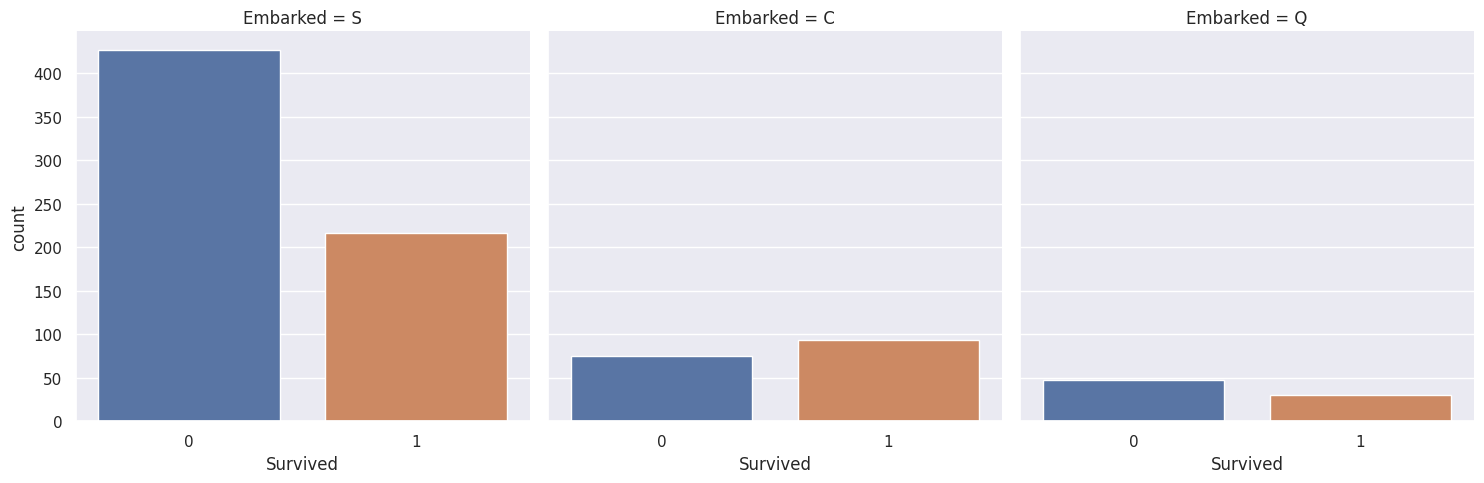

In [25]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train)
plt.show()

Строим больше графиков(бесконечное количество + любые гипотезы можно выдвигать)

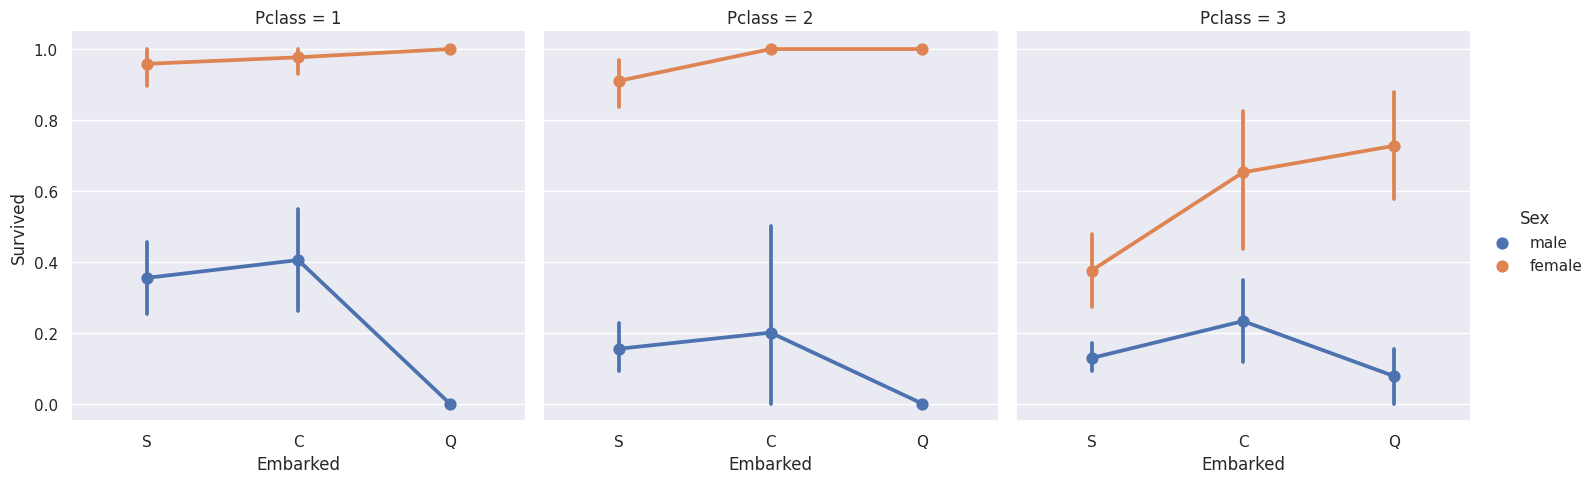

In [26]:
sns.catplot(x='Embarked', y='Survived', col='Pclass', hue='Sex', kind='point', data=df_train)
plt.show()

In [27]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True).style.background_gradient(cmap='autumn_r')

Проанализируем возраст, можем разбить на несколько групп

In [28]:
df_train['Age_bin'] = np.nan
for i in range(8, 0, -1):
  df_train.loc[df_train['Age'] <= i*10, 'Age_bin'] = i

print(df_train[['Age', 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


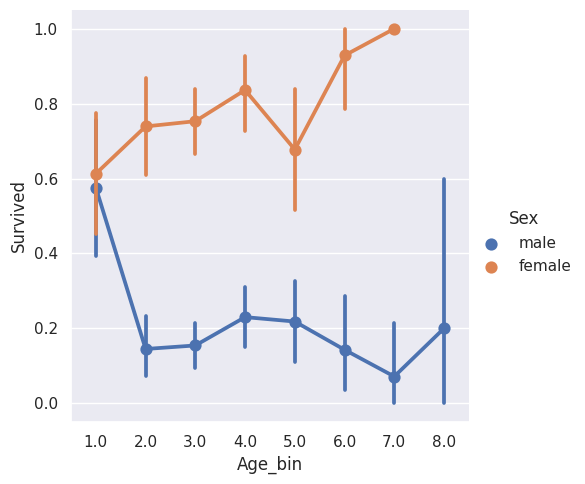

In [29]:
sns.catplot(x='Age_bin', y='Survived',  hue='Sex', kind='point', data=df_train)

Видно, что выгоднее всего быть ребенком или стариком, женщиной
и есть одна старая женщина, которая спаслась, что не удивительно, смотря на наши данные

У нас все джентльмены

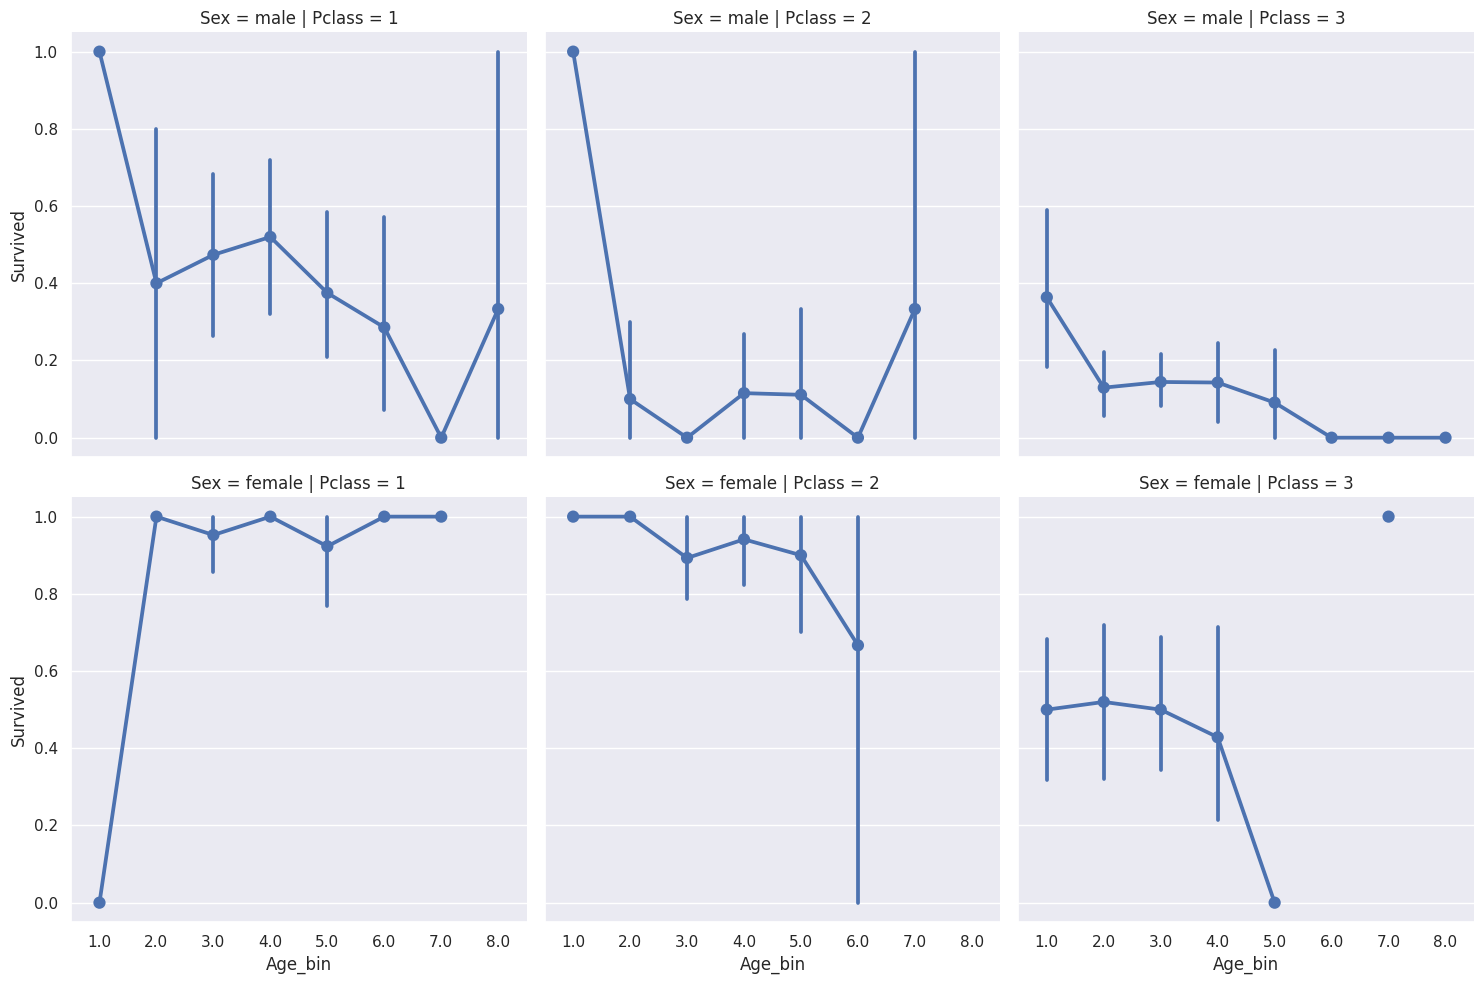

In [34]:
sns.catplot(x='Age_bin', y='Survived', col='Pclass', row='Sex', kind='point', data=df_train)

In [35]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Сравним еще с ценой

In [51]:
df_train['Fare_bin'] = np.nan
for i in range(12, 0, -1):
        df_train.loc[df_train['Fare'] <= i*50, 'Fare_bin'] = i

print(df_train[['Fare_bin', 'Fare']])

     Fare_bin     Fare
0         1.0   7.2500
1         2.0  71.2833
2         1.0   7.9250
3         2.0  53.1000
4         1.0   8.0500
..        ...      ...
886       1.0  13.0000
887       1.0  30.0000
888       1.0  23.4500
889       1.0  30.0000
890       1.0   7.7500

[891 rows x 2 columns]


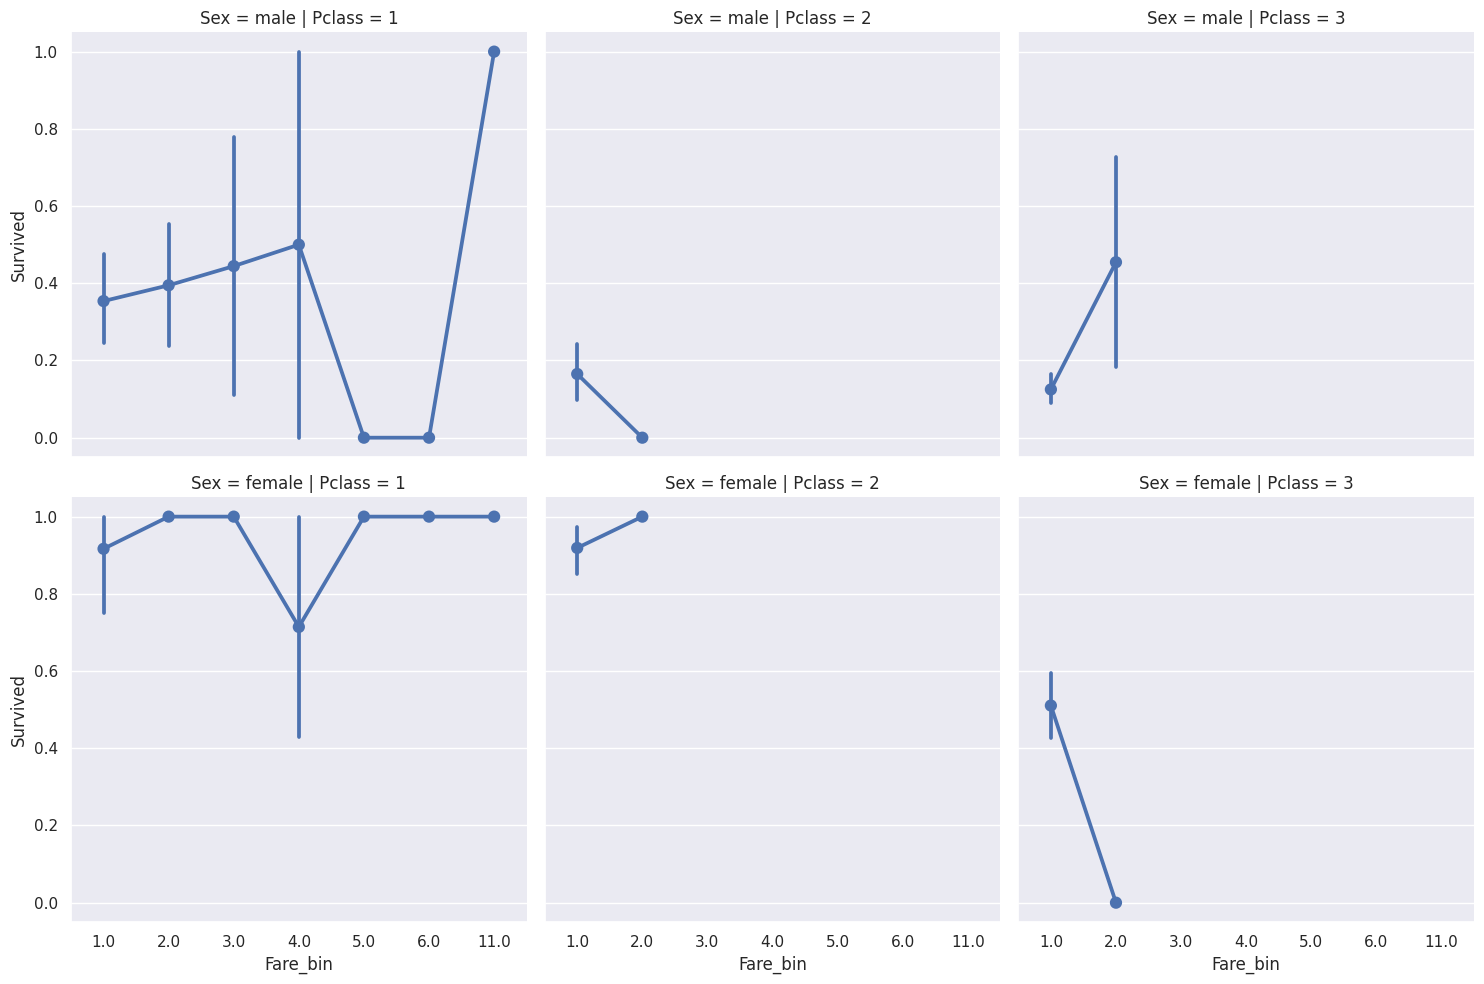

In [52]:
sns.catplot(x='Fare_bin', y='Survived', col='Pclass', row = 'Sex', kind='point', data=df_train)

Создадим новые столбцы с бинарными данными(распилим датасет по некоторым столбцам)

In [55]:
titanik_data_1 = df_train.copy()
titanik_data_1 = pd.get_dummies(titanik_data_1, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
titanik_data_1

Survived   Age  SibSp  Parch     Fare  Age_bin  Fare_bin  Sex_male  \
0           0  22.0      1      0   7.2500      3.0       1.0         1   
1           1  38.0      1      0  71.2833      4.0       2.0         0   
2           1  26.0      0      0   7.9250      3.0       1.0         0   
3           1  35.0      1      0  53.1000      4.0       2.0         0   
4           0  35.0      0      0   8.0500      4.0       1.0         1   
..        ...   ...    ...    ...      ...      ...       ...       ...   
886         0  27.0      0      0  13.0000      3.0       1.0         1   
887         1  19.0      0      0  30.0000      2.0       1.0         0   
888         0   NaN      1      2  23.4500      NaN       1.0         0   
889         1  26.0      0      0  30.0000      3.0       1.0         1   
890         0  32.0      0      0   7.7500      4.0       1.0         1   

     Embarked_Q  Embarked_S  Pclass_2  Pclass_3  
0             0           1         0         1  
1             0           0         0         0  
2             0           1         0         1  
3             0           1         0         0  
4             0           1         0         1  
..          ...         ...       ...       ...  
886           0           1         1         0  
887           0           1         0         0  
888           0           1         0         1  
889           0           0         0         0  
890           1           0         0         1  

[891 rows x 12 columns]

Теперь можно проще вывести тепловую карту(карта корреляций)

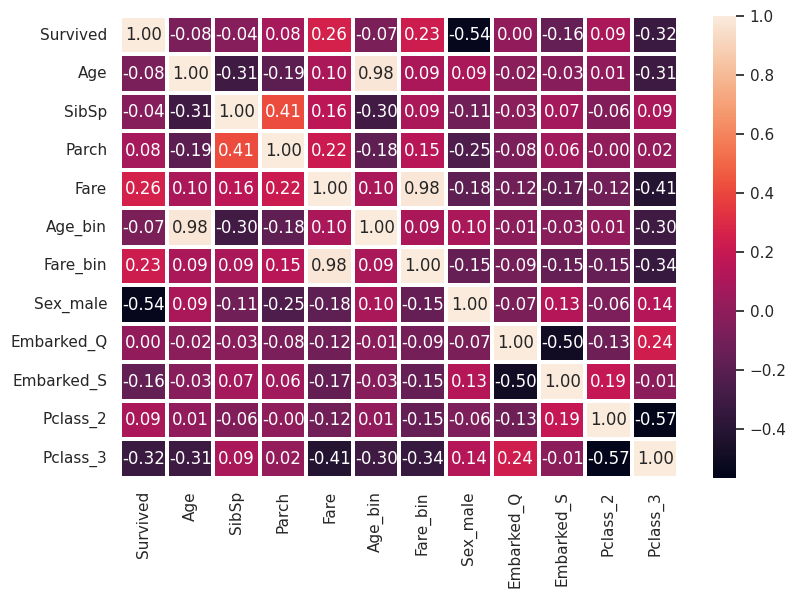

In [57]:
corr = titanik_data_1.corr()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidth=1.5, fmt='.2f', ax=ax)
plt.show()

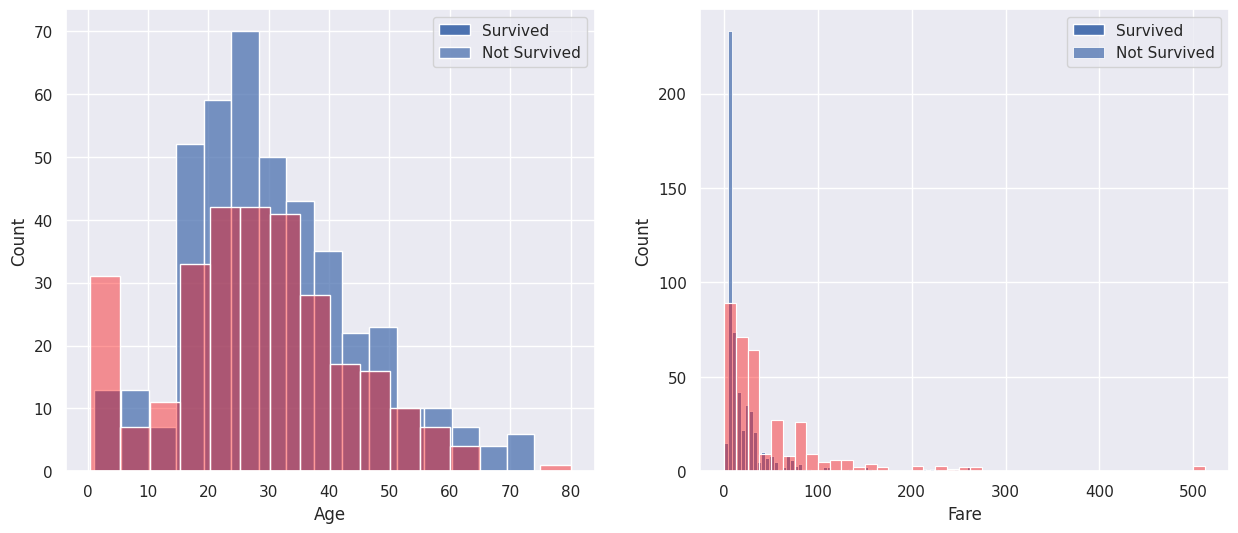

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax = ax.flatten()
sns.histplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax[0])
sns.histplot(df_train[df_train['Survived'] == 1]['Age'], color='red', alpha=0.4, ax=ax[0])
sns.histplot(df_train[df_train['Survived'] == 0]['Fare'], ax=ax[1])
sns.histplot(df_train[df_train['Survived'] == 1]['Fare'], color='red', alpha=0.4, ax=ax[1])
ax[0].legend(['Survived', 'Not Survived'])
ax[1].legend(['Survived', 'Not Survived'])

plt.show()

In [61]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b74ece30db5b180bb5dde16d8750627c24aab6f16b9e2235e1815824cd7fc78c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [63]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_train, title = 'Pandas Profiling Report')
profile

<ipython-input-63-8d6bdf693587>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы:
- Самый важный фактор у нас это корреляция с полом человека, мужчины, судя по гарфикам, погибали в большем количестве, чем женщины
- Далее замечаем, что большая часть погибших в 3 классе, включая и девушек, по сравнению с остальными классами девушки больше погибали в 3-м
- То есть выживаемость по большей части зависела от пола и класса человека
- так же, дети и старики с большей вероятностью выживали